[https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308281-comparez-votre-algorithme-a-des-approches-de-regression-naives]()

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('winequality-white.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

In [2]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 ) # 30% des données dans le jeu de test

In [3]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [4]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=11)

knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [5]:
y_pred = knn.predict(X_test_std)

In [6]:
knn.score(X_test_std, y_test)

0.3465235285211701

In [7]:
from sklearn import metrics
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.72


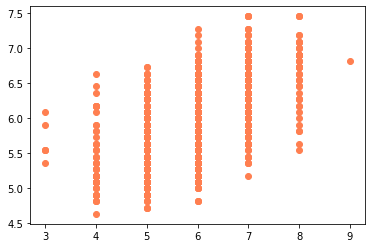

In [8]:
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred, color='coral')

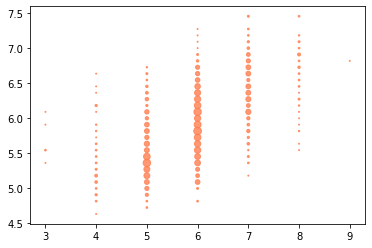

In [9]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
    [k[0] for k in keys], # vraie valeur (abscisse)
    [k[1] for k in keys], # valeur predite (ordonnee)
    s=[sizes[k] for k in keys], # taille du marqueur
    color='coral', alpha =0.8)

comparaison avec un modele naïf  aleatoire

In [10]:
y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [11]:
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))

RMSE : 1.95


comparaison avec un modele naïf qui donne la moyenne

In [12]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Evaluate
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))

RMSE : 0.89
